# Libraies

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization

# Data

## Mean

In [2]:
t_dataset_mean = pd.read_csv("T_data_mean.csv")

x_data_mean = t_dataset_mean.drop("T_mean", axis = 1, inplace = False)
x_data_mean = x_data_mean.drop("T_SD", axis = 1, inplace = False)

y_data_mean = t_dataset_mean["T_mean"]

x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(x_data_mean, y_data_mean, test_size = 0.3, random_state = 2)

print('x_train_mean',x_train_mean.shape)
print('y_train_mean',y_train_mean.shape)
print('x_test_mean',x_test_mean.shape)
print('y_test_mean',y_test_mean.shape)

x_train_mean (1175, 3)
y_train_mean (1175,)
x_test_mean (504, 3)
y_test_mean (504,)


## T

In [3]:
t_dataset_t = pd.read_csv("T_data_t.csv")

x_data_t = t_dataset_t.drop("T", axis = 1, inplace = False)
y_data_t = t_dataset_t["T"]

x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(x_data_t, y_data_t, test_size = 0.3, random_state = 2)

print('x_train_t',x_train_t.shape)
print('y_train_t',y_train_t.shape)
print('x_test_t',x_test_t.shape)
print('y_test_t',y_test_t.shape)

x_train_t (270319, 4)
y_train_t (270319,)
x_test_t (115851, 4)
y_test_t (115851,)


# Model

## Mean

Mean Squared Error: 0.00018163869466726671
0.9981282443420791
0.9934329042163651


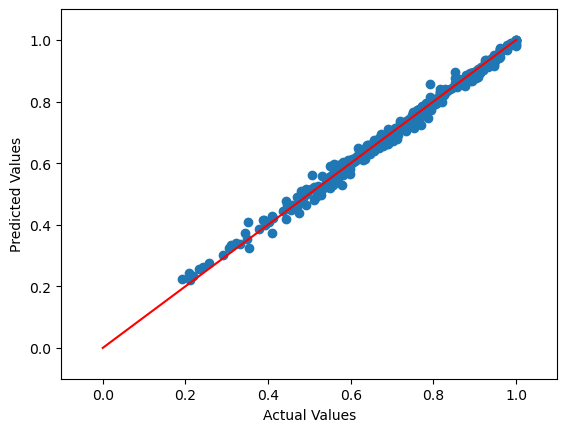

In [4]:
rf_mean = RandomForestRegressor(n_estimators=212, random_state=2)
rf_mean.fit(x_train_mean, y_train_mean)

rf_mean_pred = rf_mean.predict(x_test_mean)
# 모델 평가
mse = mean_squared_error(y_test_mean, rf_mean_pred)
print(f'Mean Squared Error: {mse}')

# 결과 시각화
x = np.linspace(0, 1, 10)

print(rf_mean.score(x_train_mean, y_train_mean))
print(rf_mean.score(x_test_mean, y_test_mean))
plt.scatter(y_test_mean, rf_mean_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

## T

mean Squared Error: 8.05288042376124e-07
0.9999958356514217
0.9999723161607548


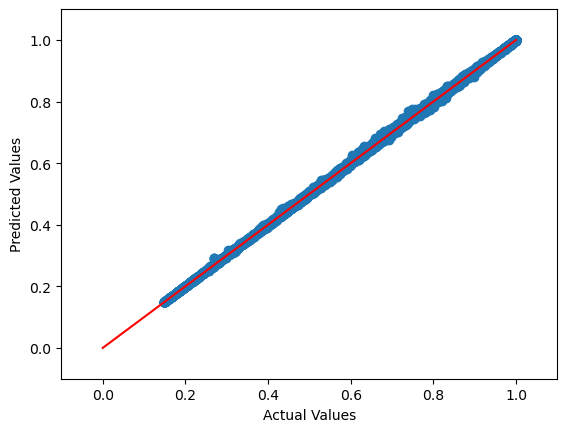

In [6]:
rf_t = RandomForestRegressor(n_estimators=100, random_state=2)
rf_t.fit(x_train_t, y_train_t)

rf_t_pred = rf_t.predict(x_test_t)
# 모델 평가
mse = mean_squared_error(y_test_t, rf_t_pred)
print(f'mean Squared Error: {mse}')

# 결과 시각화
x = np.linspace(0, 1, 10)

print(rf_t.score(x_train_t, y_train_t))
print(rf_t.score(x_test_t, y_test_t))
plt.scatter(y_test_t, rf_t_pred)
plt.plot(x, x, '-r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Reverse engineering

## thARC

In [31]:
nSub, nARC = 2.2, 1.3

def train_acc(thARC):
    t_mean = rf_mean.predict([[nSub, nARC, thARC]])
    
    return t_mean[0]

pbounds = {'thARC': (0, 1.0)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=2,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50)

|   iter    |  target   |   thARC   |
-------------------------------------
| 1         | 0.8643    | 0.436     |
| 2         | 0.8547    | 0.02593   |
| 3         | 0.8711    | 0.5497    |
| 4         | 0.8643    | 0.4353    |
| 5         | 0.8643    | 0.4204    |
| 6         | 0.8717    | 0.6726    |
| 7         | 0.8927    | 0.8965    |
| 8         | 0.9091    | 1.0       |
| 9         | 0.9091    | 0.9886    |
| 10        | 0.9091    | 0.9943    |
| 11        | 0.9091    | 0.9755    |
| 12        | 0.9091    | 0.9645    |
| 13        | 0.9091    | 0.9755    |
| 14        | 0.8553    | 0.219     |
| 15        | 0.9091    | 0.9692    |
| 16        | 0.9091    | 0.958     |
| 17        | 0.9091    | 0.9829    |
| 18        | 0.9091    | 0.9622    |
Data point [1.] is not unique. 1 duplicates registered. Continuing ...
| 19        | 0.9091    | 1.0       |
| 20        | 0.9091    | 0.9537    |
| 21        | 0.9091    | 0.9577    |
| 22        | 0.9091    | 0.995     |
| 23        | 0.9

Best thARC: 0.952021
Then T_mean: 0.931452


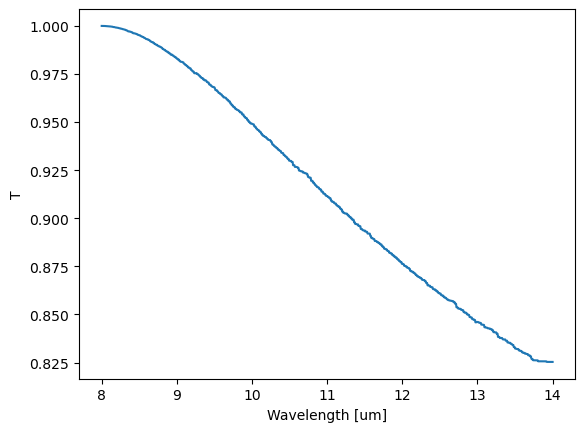

In [49]:
# 결과 시각화
nSub, nARC, thARC = nSub, nARC, optimizer.max["params"]["thARC"]
wave = np.linspace(8, 14, 1000)
t = [rf_t.predict([[nSub, nARC, thARC, w]]) for w in wave]

print("Best thARC: {:3f}".format(optimizer.max["params"]["thARC"]))
print("Then T_mean: {:3f}".format(optimizer.max["target"]))

plt.figure()
plt.plot(wave, t)
plt.xlabel('Wavelength [um]')
plt.ylabel('T')
plt.show()

## nARC

In [28]:
nSub, thARC = 2.39, 0.8

def train_acc(nARC):
    t_mean = rf_mean.predict([[nSub, nARC, thARC]])
    
    return t_mean[0]

pbounds = {'nARC': (1.0, 5.0)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50)

|   iter    |  target   |   nARC    |
-------------------------------------
| 1         | 0.7567    | 2.668     |
| 2         | 0.5261    | 3.881     |
| 3         | 0.8257    | 1.0       |
| 4         | 0.8681    | 2.209     |
| 5         | 0.8823    | 1.587     |
| 6         | 0.8778    | 1.881     |
| 7         | 0.5181    | 5.0       |
| 8         | 0.8813    | 1.378     |
| 9         | 0.8813    | 1.48      |
| 10        | 0.8803    | 1.72      |
| 11        | 0.8773    | 2.043     |
| 12        | 0.8803    | 1.629     |
| 13        | 0.8533    | 1.238     |
| 14        | 0.6335    | 3.172     |
| 15        | 0.8803    | 1.794     |
| 16        | 0.8803    | 1.72      |
| 17        | 0.8823    | 1.543     |
| 18        | 0.8813    | 1.419     |
| 19        | 0.8823    | 1.565     |
| 20        | 0.8823    | 1.565     |
| 21        | 0.8823    | 1.566     |
| 22        | 0.8823    | 1.532     |
| 23        | 0.8823    | 1.553     |
| 24        | 0.8823    | 1.572     |
| 25        

Best nARC: 1.587024
Then T_mean: 0.882266


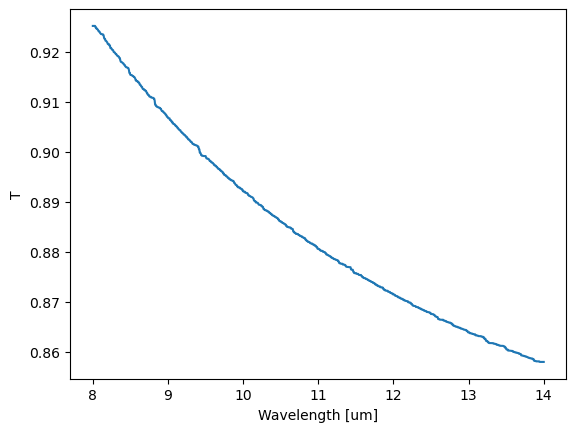

In [57]:
# 결과 시각화
nSub, nARC, thARC = nSub, optimizer.max["params"]["nARC"], thARC
wave = np.linspace(8, 14, 1000)
t = [rf_t.predict([[nSub, nARC, thARC, w]]) for w in wave]

print("Best nARC: {:3f}".format(optimizer.max["params"]["nARC"]))
print("Then T_mean: {:3f}".format(optimizer.max["target"]))

plt.figure()
plt.plot(wave, t)
plt.xlabel('Wavelength [um]')
plt.ylabel('T')
plt.show()

## thARC + nARC

In [34]:
nSub = 2.2

def train_acc(nARC, thARC):
    t_mean = rf_mean.predict([[nSub, nARC, thARC]])
    
    return t_mean[0]

pbounds = {'nARC': (1.0, 5.0), 'thARC': (0, 1.0)} # 범위 설정

optimizer = BayesianOptimization(
    f=train_acc,
    pbounds=pbounds ,
    random_state=1,
    allow_duplicate_points=True)

optimizer.maximize(init_points=5 , n_iter= 50)

|   iter    |  target   |   nARC    |   thARC   |
-------------------------------------------------
| 1         | 0.7223    | 2.668     | 0.7203    |
| 2         | 0.8587    | 1.0       | 0.3023    |
| 3         | 0.8578    | 1.587     | 0.09234   |
| 4         | 0.87      | 1.745     | 0.3456    |
| 5         | 0.7974    | 2.587     | 0.5388    |
| 6         | 0.8684    | 1.435     | 0.3732    |
| 7         | 0.9004    | 1.618     | 0.7405    |
| 8         | 0.8829    | 1.597     | 0.6288    |
| 9         | 0.9091    | 1.31      | 1.0       |
| 10        | 0.8574    | 2.337     | 0.0       |
| 11        | 0.9388    | 1.838     | 1.0       |
| 12        | 0.8564    | 5.0       | 0.0       |
| 13        | 0.6693    | 4.618     | 1.0       |
| 14        | 0.855     | 3.69      | 0.0       |
| 15        | 0.8726    | 1.594     | 0.4067    |
| 16        | 0.9388    | 1.832     | 0.9942    |
| 17        | 0.8554    | 3.018     | 0.0       |
| 18        | 0.8551    | 4.343     | 0.0       |


Best nARC: 1.746398
Best thARC: 0.998819
Then T_mean: 0.939170


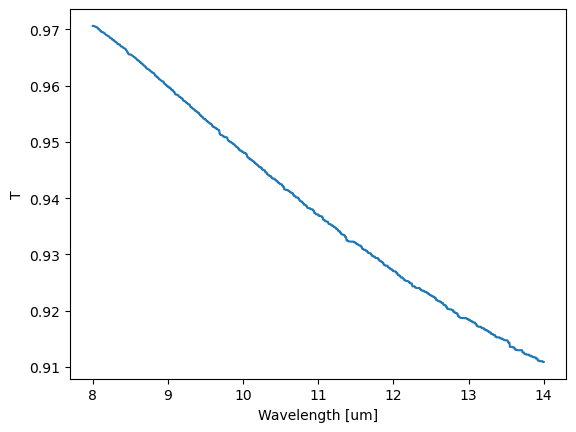

In [63]:
# 결과 시각화
nSub, nARC, thARC = nSub, optimizer.max["params"]["nARC"], optimizer.max["params"]["thARC"]
wave = np.linspace(8, 14, 1000)
t = [rf_t.predict([[nSub, nARC, thARC, w]]) for w in wave]

print("Best nARC: {:3f}".format(optimizer.max["params"]["nARC"]))
print("Best thARC: {:3f}".format(optimizer.max["params"]["thARC"]))
print("Then T_mean: {:3f}".format(optimizer.max["target"]))

plt.figure()
plt.plot(wave, t)
plt.xlabel('Wavelength [um]')
plt.ylabel('T')
plt.show()

# Plot

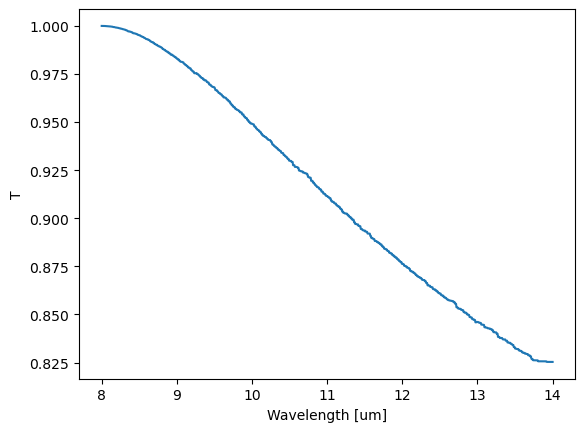

In [44]:
# 결과 시각화
nSub, nARC, thARC = 4, 2, 1
wave = np.linspace(8, 14, 1000)
t = [rf_t.predict([[nSub, nARC, thARC, w]]) for w in wave]

plt.figure()
plt.plot(wave, t)
plt.xlabel('Wavelength [um]')
plt.ylabel('T')
plt.show()

# Validation

Mean Squared Error: 1.3077486960550534e-05


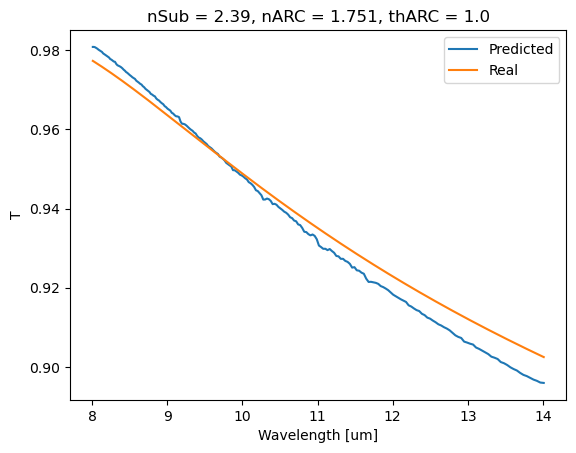

In [114]:
# 결과 시각화
t_data_real = pd.read_csv("nth2.csv")

nSub, nARC, thARC = 2.39, 1.751, 1.0
w_array = t_data_real["w"].values
t_pred = [rf_t.predict([[nSub, nARC, thARC, w]]) for w in w_array]

mse = mean_squared_error(t_pred, t_data_real["t"])
print(f'Mean Squared Error: {mse}')

plt.figure()
plt.plot(wave, t_pred, label='Predicted')
plt.plot(t_data_real["w"], t_data_real["t"], label='Real')
plt.legend()
plt.title(f"nSub = {nSub}, nARC = {nARC}, thARC = {thARC}")
plt.xlabel('Wavelength [um]')
plt.ylabel('T')
plt.show()